In [1]:
%matplotlib inline

import os,sys,inspect

PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import seaborn as sns

# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


import plotly.express as px
import matplotlib.pyplot as plt
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data: features
data = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')

# read labels: song_happiness
labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/src/Data (cleaned)/Labels/song_happiness_labels.csv')
label= labels.set_index('track_id')

# merge labels with data
data = data.merge(labels, on='track_id')

# remove duplicate rows
data.drop_duplicates(keep=False, inplace=True)
# remove Null values (if there are)
data.dropna()

# reset index to track_id
data = data.set_index('track_id')
data.rename({'valence': 'song_emotion'}, axis='columns', inplace=True)

,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)","(chroma_cens, kurtosis, 10)",...,"(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)",song_emotion
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448,happy
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330,sad
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861,happy
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800,happy
134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,1.438509,...,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623,happy


In [3]:
# encoding labels
le = preprocessing.LabelEncoder()
data['song_emotion'] = le.fit_transform(data['song_emotion'])
data.song_emotion.value_counts()

1    7724
0    5405
Name: song_emotion, dtype: int64

In [4]:
# remove labels from dataset 
labels = data[['song_emotion']]
data.drop('song_emotion', axis=1, inplace=True)


In [5]:
# split data in traning and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42, stratify=labels,
                                                   shuffle=True) 

In [7]:
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# importing models 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [48]:
#svm
svm = SVC(kernel='rbf', C=1.419617535998578, random_state=42)

#random forest
rf = RandomForestClassifier(min_samples_split=20, min_samples_leaf=5,n_estimators= 200, max_depth=5, criterion='gini')

#neural network 
mlp = MLPClassifier(hidden_layer_sizes=(60,20), alpha=0.11744317773833411,
                    learning_rate='adaptive', solver='sgd', activation='relu', random_state=42, max_iter=600)

#decision tree
dt = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini')

#knn
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean', weights='distance')  

models = [svm, rf, mlp, dt, knn]

In [12]:
X_train.shape

(9190, 518)

dataset_sizes = 10%, 20%, 40%, 50%, 70%, 80%, 100%

In [63]:
dataset_sizes = [int(X_train.shape[0]*0.05), int(X_train.shape[0]*0.10), int(X_train.shape[0]*0.2), int(X_train.shape[0]*0.4), int(X_train.shape[0]*0.5), int(X_train.shape[0]*0.8), X_train.shape[0]]

In [64]:
from tqdm import tqdm

acc_svm = []
acc_knn = []
acc_mlp = []
acc_dt = []
acc_rf = []

models_name = [acc_svm, acc_rf, acc_mlp, acc_dt, acc_knn]

for model_name, model in zip(models_name, models):
    for size in tqdm(dataset_sizes):    
        model.fit(X_train[:size,:], y_train[:size])
        y_pred = model.predict(X_test)
        model_name.append(accuracy_score(y_test, y_pred))


100%|██████████| 7/7 [01:31<00:00, 13.13s/it]


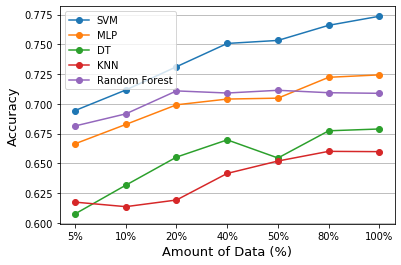

In [77]:
x_labels = ['5%', '10%', '20%', '40%', '50%', '80%', '100%']
x_position =[0, 1, 2, 3, 4, 5, 6]

plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

plt.plot(acc_svm, label='SVM',marker='o')
plt.plot(acc_mlp, label = 'MLP', marker='o')
plt.plot(acc_dt,label = 'DT', marker='o')
plt.plot(acc_knn,label = 'KNN', marker='o')
plt.plot(acc_rf,label = 'Random Forest', marker='o')

plt.xlabel('Amount of Data (%)', fontsize=13)
plt.xticks(x_position, x_labels)
plt.ylabel('Accuracy',fontsize=13)
plt.legend()